In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow

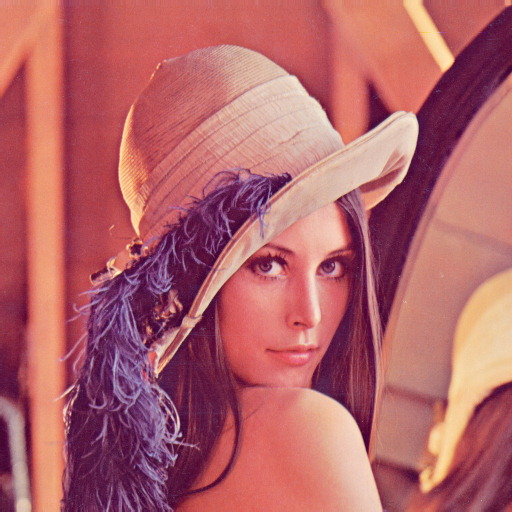

In [ ]:
img_cv = cv2.imread("sample.jpg")
cv2_imshow(img_cv)

In [ ]:
img_cv.shape

(512, 512, 3)

In [ ]:
height, width, _ = img_cv.shape

In [ ]:
#resze to 256x256 pixels
resized_img_cv = cv2.resize(img_cv,(256,256))

In [ ]:
resized_img_cv.shape

(256, 256, 3)

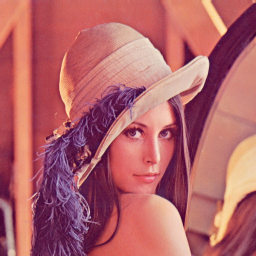

In [ ]:
cv2_imshow(resized_img_cv)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
#Rotate image by 45 degrees

#First get the center of the image
center_img = (height //2, width //2)
center_img

(256, 256)

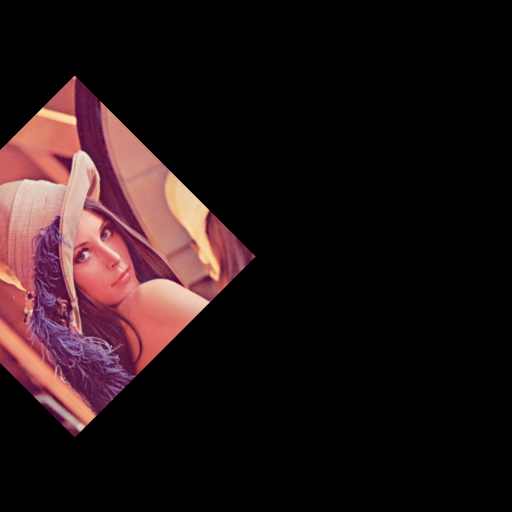

In [ ]:
rotation_matrix = cv2.getRotationMatrix2D(center_img, angle=45, scale=1)
rotated_img = cv2.warpAffine(resized_img_cv, M=rotation_matrix, dsize=(width, height))
cv2_imshow(rotated_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

Text(0.5, 1.0, 'Rotated Image')

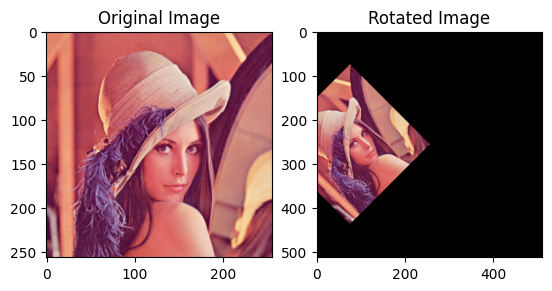

In [ ]:
#display the original and transformed image side by side
plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(resized_img_cv, cv2.COLOR_BGR2RGB))
plt.title("Original Image")

plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(rotated_img, cv2.COLOR_BGR2RGB))
plt.title("Rotated Image")

In [ ]:
from PIL import Image
import math

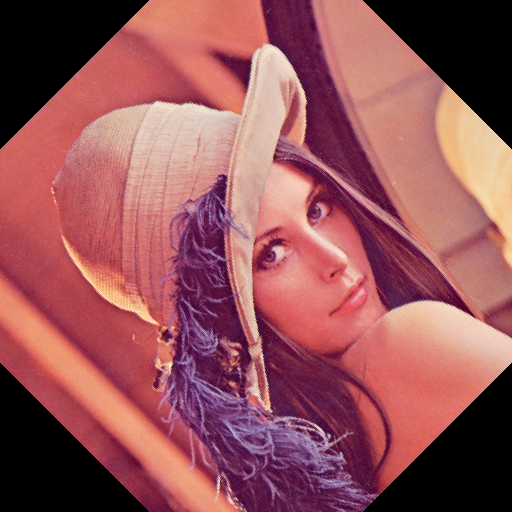

In [ ]:
img = Image.open("sample.jpg")
img.resize((256,256))
rot_img = img.rotate(45)
rot_img

Text(0.5, 1.0, 'PIL Image')

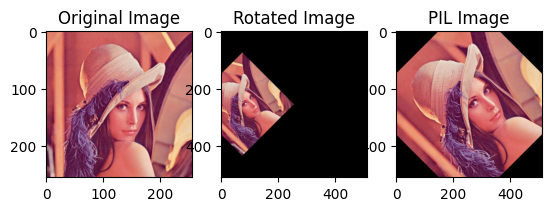

In [ ]:
#display the original and transformed image side by side
plt.subplot(1,3,1)
plt.imshow(cv2.cvtColor(resized_img_cv, cv2.COLOR_BGR2RGB))
plt.title("Original Image")

plt.subplot(1,3,2)
plt.imshow(cv2.cvtColor(rotated_img, cv2.COLOR_BGR2RGB))
plt.title("Rotated Image")

plt.subplot(1,3,3)
plt.imshow(rot_img)
plt.title("PIL Image")

In [ ]:
#save the image
cv2.imwrite("rotated_img.jpg", rotated_img)

True

In [ ]:
rot_img.save("transformed_img.jpg")

Q2. Histogram Equalization

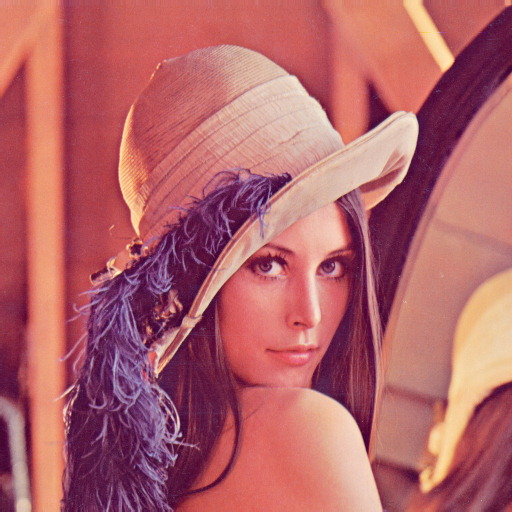

In [ ]:
img_2 = cv2.imread("sample.jpg")
cv2_imshow(img_2)

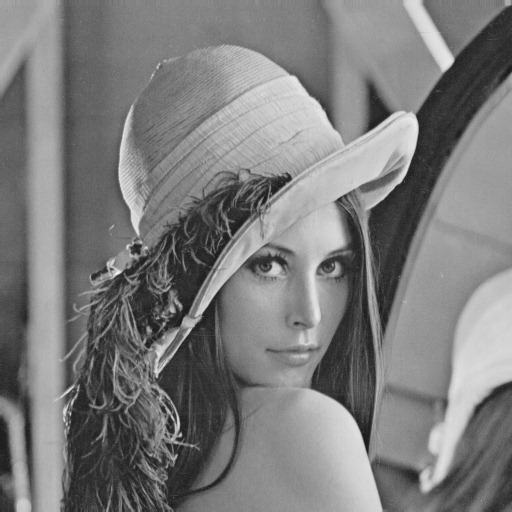

In [ ]:
grayscale_img = cv2.cvtColor(img_2, cv2.COLOR_BGR2GRAY)
cv2_imshow(grayscale_img)

In [ ]:
# Step 2: Perform histogram equalization to enhance contrast
equalized_img = cv2.equalizeHist(grayscale_img)

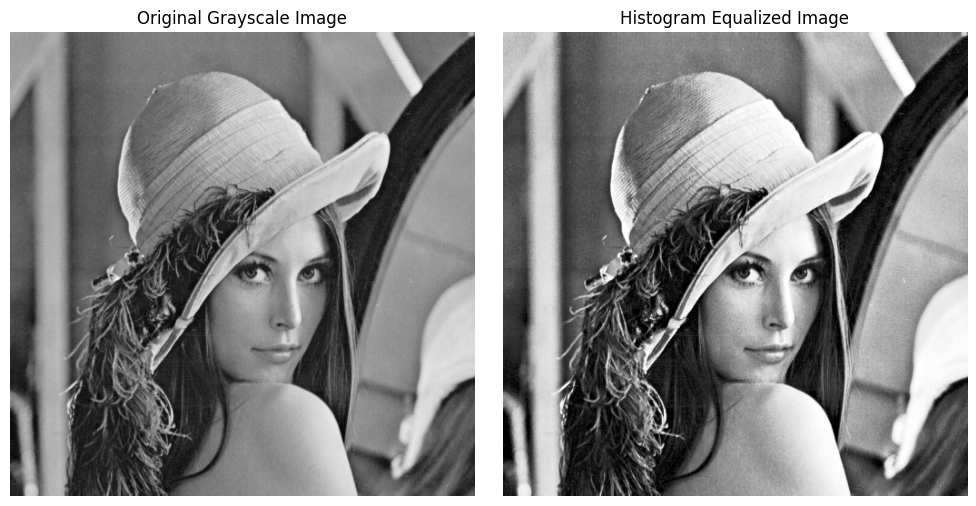

In [ ]:
plt.figure(figsize=(10, 5))  # Set the figure size
plt.subplot(1, 2, 1)  # Create the first subplot (1 row, 2 columns, first position)
plt.imshow(grayscale_img, cmap='gray')
plt.title("Original Grayscale Image")
plt.axis("off")

# Create axes for the second subplot
plt.subplot(1, 2, 2)  # Create the second subplot (1 row, 2 columns, second position)
plt.imshow(equalized_img, cmap='gray')
plt.title("Histogram Equalized Image")
plt.axis("off")

plt.tight_layout()  # Adjust subplot parameters for a tight layout
plt.show()  # Display the figure

In [ ]:
cv2.imwrite("equalized_img.jpg", equalized_img)

True

# Q3 Text Preprocessing and TF-IDF Vectorizer

In [ ]:
import nltk
import pandas as pd
import string
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
nltk.download("punkt_tab")
nltk.download("stopwords")
nltk.download("wordnet")
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
text = open("sample1.txt")
lines = text.readlines()
lines

['\n',
 '\n',
 'The names "John Doe" for males, "Jane Doe" or "Jane Roe" for females, or "Jonnie Doe" and "Janie Doe" for children, or just "Doe" non-gender-specifically are used as placeholder names for a party whose true identity is unknown or must be withheld in a legal action, case, or discussion. The names are also used to refer to acorpse or hospital patient whose identity is unknown. This practice is widely used in the United States and Canada, but is rarely used in other English-speaking countries including the United Kingdom itself, from where the use of "John Doe" in a legal context originates. The names Joe Bloggs or John Smith are used in the UK instead, as well as in Australia and New Zealand.\n',
 '\n',
 'John Doe is sometimes used to refer to a typical male in other contexts as well, in a similar manner to John Q. Public, known in Great Britain as Joe Public, John Smith or Joe Bloggs. For example, the first name listed on a form is often John Doe, along with a fictional 

In [ ]:
with open("sample1.txt", "r") as file:
    text = file.read()

In [ ]:
text

'\n\nThe names "John Doe" for males, "Jane Doe" or "Jane Roe" for females, or "Jonnie Doe" and "Janie Doe" for children, or just "Doe" non-gender-specifically are used as placeholder names for a party whose true identity is unknown or must be withheld in a legal action, case, or discussion. The names are also used to refer to acorpse or hospital patient whose identity is unknown. This practice is widely used in the United States and Canada, but is rarely used in other English-speaking countries including the United Kingdom itself, from where the use of "John Doe" in a legal context originates. The names Joe Bloggs or John Smith are used in the UK instead, as well as in Australia and New Zealand.\n\nJohn Doe is sometimes used to refer to a typical male in other contexts as well, in a similar manner to John Q. Public, known in Great Britain as Joe Public, John Smith or Joe Bloggs. For example, the first name listed on a form is often John Doe, along with a fictional address or other fict

In [ ]:
#Tokenization
tokens = word_tokenize(text)
tokens

['The',
 'names',
 '``',
 'John',
 'Doe',
 "''",
 'for',
 'males',
 ',',
 '``',
 'Jane',
 'Doe',
 "''",
 'or',
 '``',
 'Jane',
 'Roe',
 "''",
 'for',
 'females',
 ',',
 'or',
 '``',
 'Jonnie',
 'Doe',
 "''",
 'and',
 '``',
 'Janie',
 'Doe',
 "''",
 'for',
 'children',
 ',',
 'or',
 'just',
 '``',
 'Doe',
 "''",
 'non-gender-specifically',
 'are',
 'used',
 'as',
 'placeholder',
 'names',
 'for',
 'a',
 'party',
 'whose',
 'true',
 'identity',
 'is',
 'unknown',
 'or',
 'must',
 'be',
 'withheld',
 'in',
 'a',
 'legal',
 'action',
 ',',
 'case',
 ',',
 'or',
 'discussion',
 '.',
 'The',
 'names',
 'are',
 'also',
 'used',
 'to',
 'refer',
 'to',
 'acorpse',
 'or',
 'hospital',
 'patient',
 'whose',
 'identity',
 'is',
 'unknown',
 '.',
 'This',
 'practice',
 'is',
 'widely',
 'used',
 'in',
 'the',
 'United',
 'States',
 'and',
 'Canada',
 ',',
 'but',
 'is',
 'rarely',
 'used',
 'in',
 'other',
 'English-speaking',
 'countries',
 'including',
 'the',
 'United',
 'Kingdom',
 'itself',
 

In [ ]:
#removing punctuation
tokens1 = [word for word in tokens if word not in string.punctuation]
tokens1

['The',
 'names',
 '``',
 'John',
 'Doe',
 "''",
 'for',
 'males',
 '``',
 'Jane',
 'Doe',
 "''",
 'or',
 '``',
 'Jane',
 'Roe',
 "''",
 'for',
 'females',
 'or',
 '``',
 'Jonnie',
 'Doe',
 "''",
 'and',
 '``',
 'Janie',
 'Doe',
 "''",
 'for',
 'children',
 'or',
 'just',
 '``',
 'Doe',
 "''",
 'non-gender-specifically',
 'are',
 'used',
 'as',
 'placeholder',
 'names',
 'for',
 'a',
 'party',
 'whose',
 'true',
 'identity',
 'is',
 'unknown',
 'or',
 'must',
 'be',
 'withheld',
 'in',
 'a',
 'legal',
 'action',
 'case',
 'or',
 'discussion',
 'The',
 'names',
 'are',
 'also',
 'used',
 'to',
 'refer',
 'to',
 'acorpse',
 'or',
 'hospital',
 'patient',
 'whose',
 'identity',
 'is',
 'unknown',
 'This',
 'practice',
 'is',
 'widely',
 'used',
 'in',
 'the',
 'United',
 'States',
 'and',
 'Canada',
 'but',
 'is',
 'rarely',
 'used',
 'in',
 'other',
 'English-speaking',
 'countries',
 'including',
 'the',
 'United',
 'Kingdom',
 'itself',
 'from',
 'where',
 'the',
 'use',
 'of',
 '``',


In [ ]:
#convert to lowercase
tokens2 = [word.lower() for word in tokens1]
tokens2

['the',
 'names',
 '``',
 'john',
 'doe',
 "''",
 'for',
 'males',
 '``',
 'jane',
 'doe',
 "''",
 'or',
 '``',
 'jane',
 'roe',
 "''",
 'for',
 'females',
 'or',
 '``',
 'jonnie',
 'doe',
 "''",
 'and',
 '``',
 'janie',
 'doe',
 "''",
 'for',
 'children',
 'or',
 'just',
 '``',
 'doe',
 "''",
 'non-gender-specifically',
 'are',
 'used',
 'as',
 'placeholder',
 'names',
 'for',
 'a',
 'party',
 'whose',
 'true',
 'identity',
 'is',
 'unknown',
 'or',
 'must',
 'be',
 'withheld',
 'in',
 'a',
 'legal',
 'action',
 'case',
 'or',
 'discussion',
 'the',
 'names',
 'are',
 'also',
 'used',
 'to',
 'refer',
 'to',
 'acorpse',
 'or',
 'hospital',
 'patient',
 'whose',
 'identity',
 'is',
 'unknown',
 'this',
 'practice',
 'is',
 'widely',
 'used',
 'in',
 'the',
 'united',
 'states',
 'and',
 'canada',
 'but',
 'is',
 'rarely',
 'used',
 'in',
 'other',
 'english-speaking',
 'countries',
 'including',
 'the',
 'united',
 'kingdom',
 'itself',
 'from',
 'where',
 'the',
 'use',
 'of',
 '``',


In [ ]:
#remove stopwords
swords = set(stopwords.words("english"))
tokens3 = [word for word in tokens2 if word not in swords]
tokens3

['names',
 '``',
 'john',
 'doe',
 "''",
 'males',
 '``',
 'jane',
 'doe',
 "''",
 '``',
 'jane',
 'roe',
 "''",
 'females',
 '``',
 'jonnie',
 'doe',
 "''",
 '``',
 'janie',
 'doe',
 "''",
 'children',
 '``',
 'doe',
 "''",
 'non-gender-specifically',
 'used',
 'placeholder',
 'names',
 'party',
 'whose',
 'true',
 'identity',
 'unknown',
 'must',
 'withheld',
 'legal',
 'action',
 'case',
 'discussion',
 'names',
 'also',
 'used',
 'refer',
 'acorpse',
 'hospital',
 'patient',
 'whose',
 'identity',
 'unknown',
 'practice',
 'widely',
 'used',
 'united',
 'states',
 'canada',
 'rarely',
 'used',
 'english-speaking',
 'countries',
 'including',
 'united',
 'kingdom',
 'use',
 '``',
 'john',
 'doe',
 "''",
 'legal',
 'context',
 'originates',
 'names',
 'joe',
 'bloggs',
 'john',
 'smith',
 'used',
 'uk',
 'instead',
 'well',
 'australia',
 'new',
 'zealand',
 'john',
 'doe',
 'sometimes',
 'used',
 'refer',
 'typical',
 'male',
 'contexts',
 'well',
 'similar',
 'manner',
 'john',
 'q

In [ ]:
#join tokens
processed_text = " ".join(tokens3)
processed_text

"names `` john doe '' males `` jane doe '' `` jane roe '' females `` jonnie doe '' `` janie doe '' children `` doe '' non-gender-specifically used placeholder names party whose true identity unknown must withheld legal action case discussion names also used refer acorpse hospital patient whose identity unknown practice widely used united states canada rarely used english-speaking countries including united kingdom use `` john doe '' legal context originates names joe bloggs john smith used uk instead well australia new zealand john doe sometimes used refer typical male contexts well similar manner john q public known great britain joe public john smith joe bloggs example first name listed form often john doe along fictional address fictional information provide example fill form name also used frequently popular culture example frank capra film meet john doe john doe also name 2002 american television series similarly child baby whose identity unknown may referred baby doe notorious mu

In [ ]:
def preprocess_text(text):
    tokens = word_tokenize(text)
    tokens1 = [word for word in tokens if word not in string.punctuation]
    tokens2 = [word.lower() for word in tokens1]
    swords = set(stopwords.words("english"))
    tokens3 = [word for word in tokens2 if word not in swords]
    processed_text = " ".join(tokens3)
    return processed_text

In [ ]:
tfidf = TfidfVectorizer()
response = tfidf.fit_transform([processed_text])

In [ ]:
#convert to DataFrame
df = pd.DataFrame(response.T.toarray(), index=tfidf.get_feature_names_out(), columns=["TF-IDF"])
df

,TF-IDF
2002,0.029907
21,0.029907
acorpse,0.029907
action,0.059815
additional,0.029907
...,...
well,0.059815
whose,0.089722
widely,0.029907
withheld,0.029907


In [ ]:
df.to_csv("tfidf.csv")

# Q4. Binary Classification

In [ ]:
import pandas as pd
import re
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
def preprocess(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.lower()
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

In [ ]:
amazon = pd.read_csv("amazon_reviews.csv")
amazon.head()

,Uniq Id,Crawl Timestamp,Billing Uniq Id,Rating,Review Title,Review Rating,Review Date,User Id,Brand,Category,Sub Category,Product Description,Asin,Url,Review Content,Verified Purchase,Helpful Review Count,Manufacturer Response
0,10d8b81dc693db8a3f92e19254525d53,2020-03-17 02:32:10 +0000,c697dc43961526785292107b91a639e1,NaN,Best Natural Deodorant!!,5.0,"March 6, 2020",AGIZFDSHLSBZ7KHQ4FV65W7B3HMQ,Schmidt's Deodorant,Beauty & Personal Care,Personal Care,Schmidt’s natural deodorant formulas use innov...,B071YYMZ19,https://www.amazon.com/gp/customer-reviews/R2Q...,This is the one natural deodorant that works f...,Verified Purchase,0,NaN
1,31ef1ee4961d3fcff33e363edd7677eb,2020-03-17 02:32:10 +0000,c697dc43961526785292107b91a639e1,NaN,Schmidt's Charcoal Deodorant is the best!,5.0,"March 6, 2020",AHOZPYWO6WE5MLAZZPDUAWNKKNRQ,Schmidt's Deodorant,Beauty & Personal Care,Personal Care,Schmidt’s natural deodorant formulas use innov...,B071YYMZ19,https://www.amazon.com/gp/customer-reviews/R14...,I am staying away from the conventional deodor...,Verified Purchase,0,NaN
2,6943e517922b051cbec496be32fbb57f,2020-03-17 02:32:10 +0000,c697dc43961526785292107b91a639e1,NaN,Beware. Defective or counterfeit.,1.0,"March 6, 2020",AECC6GYWWLNCKSBG3DZDGFSYDOTA,Schmidt's Deodorant,Beauty & Personal Care,Personal Care,Schmidt’s natural deodorant formulas use innov...,B071YYMZ19,https://www.amazon.com/gp/customer-reviews/R2R...,Do not buy this from Amazon it's either defect...,Verified Purchase,One person found this helpful Helpful,NaN
3,6778c794e6ac7112981d4ebb239d6826,2020-03-17 02:32:10 +0000,c697dc43961526785292107b91a639e1,NaN,Good for infrequent shavers in cooler months i...,3.0,"March 5, 2020",AEOO6OOEO4QD7Z4F6C2FMZUCW7PA,Schmidt's Deodorant,Beauty & Personal Care,Personal Care,Schmidt’s natural deodorant formulas use innov...,B071YYMZ19,https://www.amazon.com/gp/customer-reviews/RMI...,I started using this because I was getting cys...,NO,0,NaN
4,2335a28ae24db3b2191080bfd98a86e0,2020-03-17 02:32:10 +0000,c697dc43961526785292107b91a639e1,NaN,This isn’t the true product and will hurt your...,1.0,"March 2, 2020",AEHSDCGRIMVOUG6ST35FJ4FMMW5Q,Schmidt's Deodorant,Beauty & Personal Care,Personal Care,Schmidt’s natural deodorant formulas use innov...,B071YYMZ19,https://www.amazon.com/gp/customer-reviews/R1R...,Dont buy this from amazon!!!! I never write re...,Verified Purchase,One person found this helpful Helpful,NaN


In [ ]:
amazon.isna().sum()

,0
Uniq Id,0
Crawl Timestamp,0
Billing Uniq Id,0
Rating,50
Review Title,0
Review Rating,0
Review Date,0
User Id,0
Brand,0
Category,1


In [ ]:
amazon.columns

Index(['Uniq Id', 'Crawl Timestamp', 'Billing Uniq Id', 'Rating',
       'Review Title', 'Review Rating', 'Review Date', 'User Id', 'Brand',
       'Category', 'Sub Category', 'Product Description', 'Asin', 'Url',
       'Review Content', 'Verified Purchase', 'Helpful Review Count',
       'Manufacturer Response'],
      dtype='object')

In [ ]:
amazon['Review Rating'].value_counts()

,count
Review Rating,
5.0,34
1.0,6
4.0,5
3.0,3
2.0,2


In [ ]:
amazon.shape

(50, 18)

In [ ]:
amazon['Sentiment'] = amazon['Review Rating'].apply(lambda x : 1 if x>=4 else 0)

In [ ]:
amazon['Review Content'] = amazon['Review Content'].apply(preprocess)

In [ ]:
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(amazon['Review Content'])
y = amazon['Sentiment']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25,stratify=y)

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
pred.head()

,Actual,Predicted
20,1,1
1,1,1
8,0,1
6,1,1
10,1,1


In [ ]:
pred.to_csv("pred.csv")

In [ ]:
accuracy_score(y_test, y_pred)

0.8

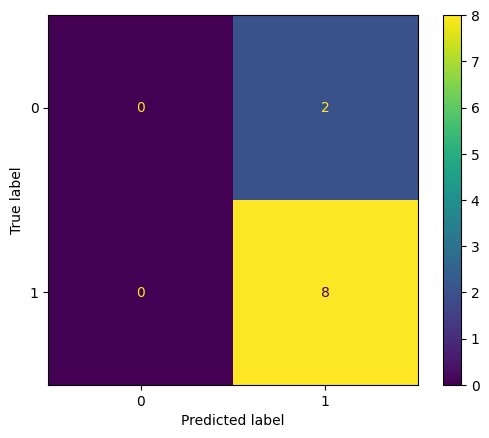

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [ ]:
import pandas as pd
import re
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Function to preprocess the text
def preprocess_text(text):
    """
    Preprocesses a given text by:
    - Removing special characters
    - Converting to lowercase
    - Tokenizing
    - Removing stop words
    """
    stop_words = set(stopwords.words('english'))

    # Remove special characters and convert to lowercase
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.lower()

    # Tokenize and remove stop words
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]

    # Join tokens back into a single string
    return ' '.join(tokens)

# Step 1: Load the dataset
file_path = "Amazon_reviews.csv"  # Replace with your dataset path
df = pd.read_csv(file_path)

# Work on the "Review Content" and "Sentiment" columns
# Assuming 'Sentiment' column contains 0 (negative) and 1 (positive) labels
df['Review Content'] = df['Review Content'].apply(preprocess_text)

# Step 2: TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Limit features for efficiency
X = tfidf_vectorizer.fit_transform(df['Review Content'])
y = df['Sentiment']

# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Build and Train Logistic Regression Model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

# Step 5: Make Predictions
y_pred = lr_model.predict(X_test)

# Step 6: Save Predictions to a file
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
predictions.to_csv("predictions.csv", index=False)
print("Predictions saved to predictions.csv")

# Step 7: Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display the Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


# LSTM

In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical

In [ ]:
max_words = 10000  # Maximum number of words to keep in the tokenizer
max_len = 100      # Maximum length of sequences (padded to this length)

In [ ]:
# Tokenize the text
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(amazon['Review Content'])
X = tokenizer.texts_to_sequences(amazon['Review Content'])

# Pad the sequences
X = pad_sequences(X, maxlen=max_len, padding='post')

# Convert the labels to numpy array
y = np.array(amazon['Sentiment'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
embedding_dim = 100
model = Sequential([
    Embedding(input_dim=max_words, output_dim=embedding_dim),
    LSTM(128, return_sequences=False),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification
])

model.build(input_shape=(None, max_len))
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ (None, 100, 100)            │       1,000,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 128)                 │         117,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,125,569 (4.29 MB)

 Trainable params: 1,125,569 (4.29 MB)

 Non-trainable params: 0 (0.00 B)

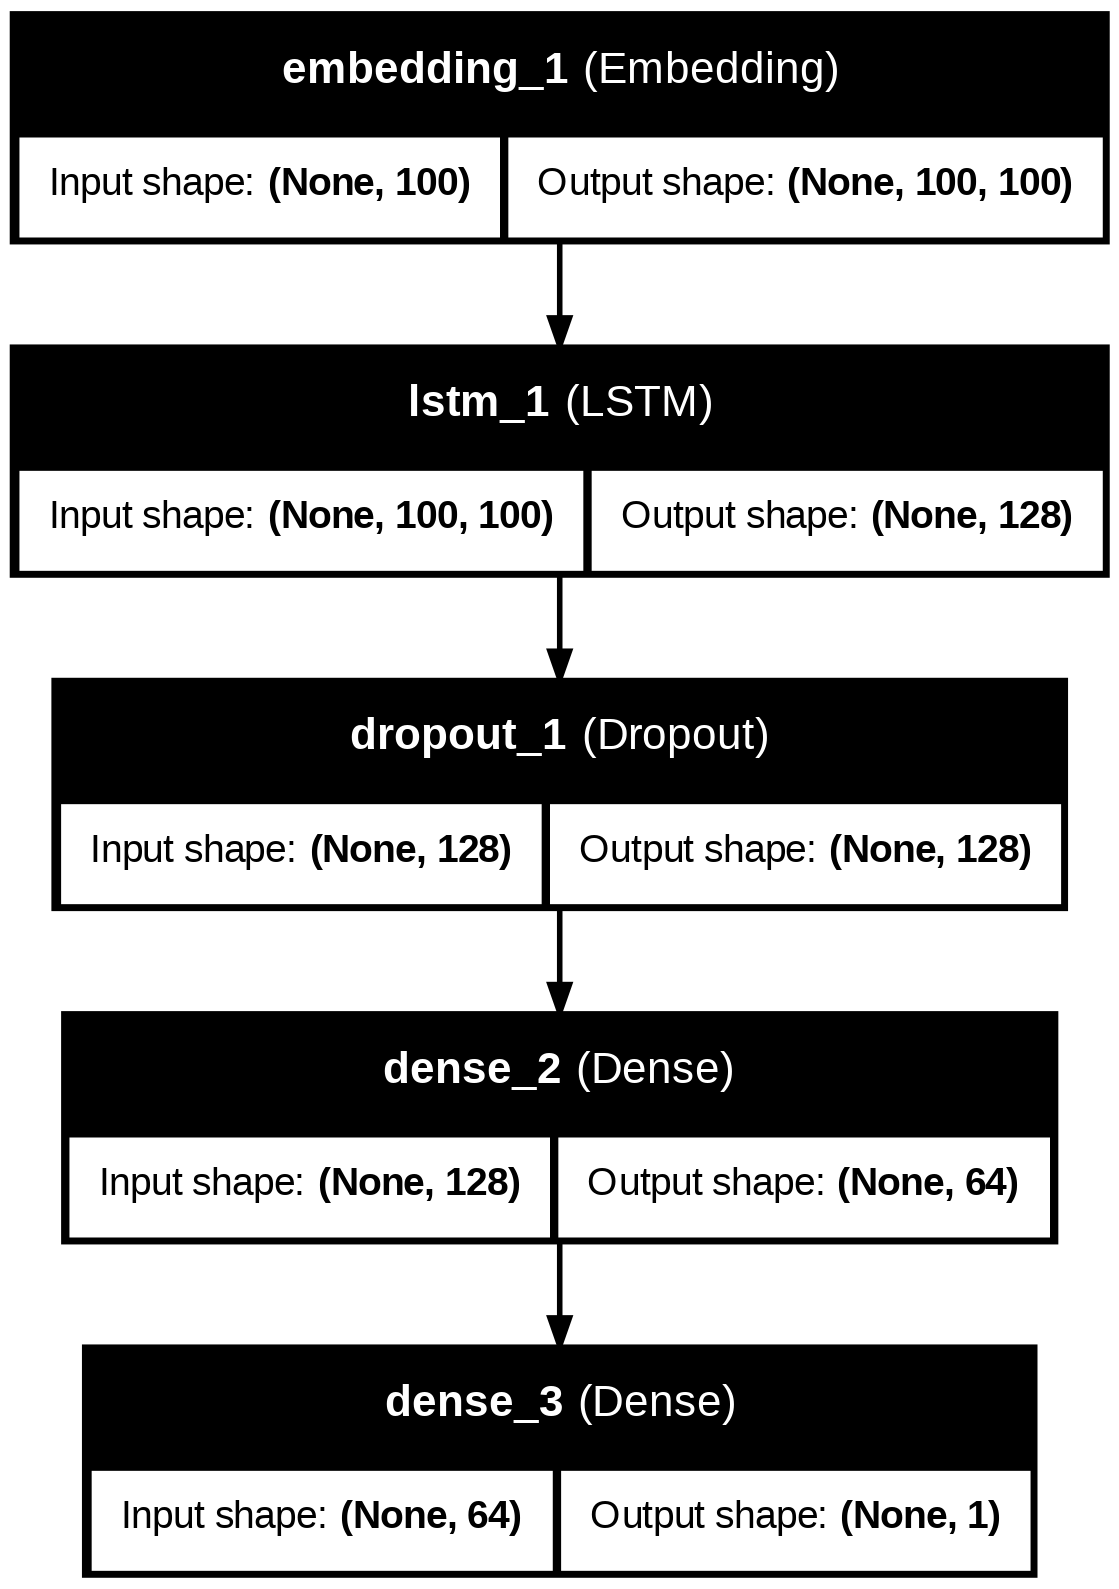

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=[X_test, y_test])

Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step - accuracy: 0.7604 - loss: 0.5108 - val_accuracy: 0.9000 - val_loss: 0.3535
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step - accuracy: 0.7500 - loss: 0.5844 - val_accuracy: 0.9000 - val_loss: 0.4101
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step - accuracy: 0.7396 - loss: 0.5643 - val_accuracy: 0.9000 - val_loss: 0.4445
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - accuracy: 0.7396 - loss: 0.5767 - val_accuracy: 0.9000 - val_loss: 0.4456
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 141ms/step - accuracy: 0.7667 - loss: 0.5690 - val_accuracy: 0.9000 - val_loss: 0.4269
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - accuracy: 0.7604 - loss: 0.5420 - val_accuracy: 0.9000 - val_loss: 0.4015
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step - accuracy: 0.7396 - loss: 0.5527 - val_accuracy: 0.9000 - val_loss: 0.3788
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - accuracy: 0.7771 - loss: 0.5309 - val_accuracy: 0.9000 - val_loss:

In [ ]:
# Step 6: Make Predictions
y_pred = (model.predict(X_test) > 0.5).astype("int32")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


In [ ]:
# Save predictions to a file
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred.flatten()})
predictions.to_csv("lstm_predictions.csv", index=False)

In [ ]:
accuracy_score(y_test, y_pred)

0.9

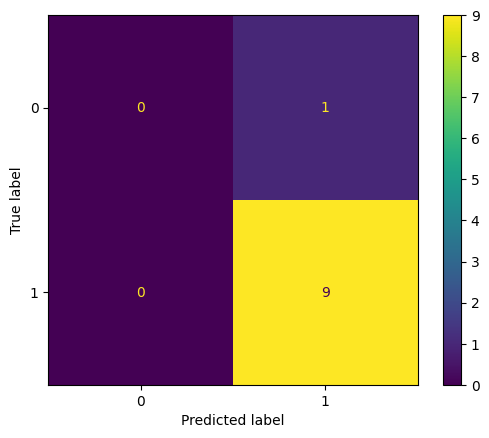

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Function to preprocess the text (reused from Logistic Regression)
def preprocess_text(text):
    """
    Preprocesses a given text by:
    - Removing special characters
    - Converting to lowercase
    - Tokenizing
    - Removing stop words
    """
    stop_words = set(stopwords.words('english'))

    # Remove special characters and convert to lowercase
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.lower()

    # Tokenize and remove stop words
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]

    # Join tokens back into a single string
    return ' '.join(tokens)

# Step 1: Load the dataset
file_path = "Amazon_reviews.csv"  # Replace with your dataset path
df = pd.read_csv(file_path)

# Work on the "Review Content" and "Sentiment" columns
# Assuming 'Sentiment' column contains 0 (negative) and 1 (positive) labels
df['Review Content'] = df['Review Content'].apply(preprocess_text)

# Step 2: Tokenization and Padding
max_words = 10000  # Maximum number of words to keep in the tokenizer
max_len = 100      # Maximum length of sequences (padded to this length)

# Tokenize the text
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(df['Review Content'])
X = tokenizer.texts_to_sequences(df['Review Content'])

# Pad the sequences
X = pad_sequences(X, maxlen=max_len, padding='post')

# Convert the labels to numpy array
y = np.array(df['Sentiment'])

# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Build the LSTM Model
embedding_dim = 100
model = Sequential([
    Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_len),
    LSTM(128, return_sequences=False),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

# Step 5: Train the Model
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2, verbose=1)

# Step 6: Make Predictions
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Save predictions to a file
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred.flatten()})
predictions.to_csv("lstm_predictions.csv", index=False)
print("Predictions saved to lstm_predictions.csv")

# Step 7: Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display the Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
